In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
base_path = '/Users/toby/STADS_Datathon2025/'
with_risk = pd.read_csv(f'{base_path}20025-03-07_cgm-datathon-challenge-flu_riskgroupsv1.csv', sep=';')
without_risk = pd.read_csv(f'{base_path}20025-03-07_cgm-datathon-challenge-flu_v1.csv', sep=';')

## Dataset Simulation

In [18]:
print(f'risk len: {len(with_risk)}')
print(f'without len {len(without_risk)}')

risk len: 35994
without len 20791


In [19]:
#with risk vaccination rate: 
print(f'with risk extrapolation sum: {with_risk['extrapolated'].sum()}, which means vaccination rate of: {(with_risk['extrapolated'].sum()/84552242)*100}')
print(f'without risk extrapolation sum: {without_risk['extrapolated'].sum()}, which means vaccination rate of: {(without_risk['extrapolated'].sum()/84552242)*100}')

with risk extrapolation sum: 15255946, which means vaccination rate of: 18.043218771182907
without risk extrapolation sum: 14059564, which means vaccination rate of: 16.628256882886678


In [21]:
df1 = with_risk.copy()
df2 = without_risk.copy()
df2['risk_groups'] = None

final_df = pd.concat([df1, df2])
print(f'data points after concat {len(final_df)}')
print(f'final df extrapolation sum: {final_df['extrapolated'].sum()}, which means vaccination rate of: {(final_df['extrapolated'].sum()/84552242)*100}')

# drop the duplicate values 
final_df = final_df.drop_duplicates()
print(f'data points after dropping duplicates {len(final_df)}')
print(f'final df extrapolation sum: {final_df['extrapolated'].sum()}, which means vaccination rate of: {(final_df['extrapolated'].sum()/84552242)*100}')

final_df.to_csv(f'{base_path}final_merged_no_dupe.csv')

#take max where indicators are the same
group_cols = final_df.columns[:-2]
max_col = final_df.columns[-2]
last_col = final_df.columns[-1]
idx = final_df.groupby(list(group_cols))[max_col].idxmax()
final_df = final_df.loc[idx].reset_index(drop=True)
print(f'data points after maxing {len(final_df)}')
print(f'final df extrapolation sum: {final_df['extrapolated'].sum()}, which means vaccination rate of: {(final_df['extrapolated'].sum()/84552242)*100}')

#now we add the risk group with the no risk group rows for the same week 
# (here is the issue that the max number will probably come from the without_risk dataset)
final_df.head()
#print(f'final df extrapolation sum: {final_df['extrapolated'].sum()}, which means vaccination rate of: {(final_df['extrapolated'].sum()/84552242)*100}')





data points after concat 56785
final df extrapolation sum: 29315510, which means vaccination rate of: 34.67147565406959
data points after dropping duplicates 40227
final df extrapolation sum: 27580936, which means vaccination rate of: 32.619993683904916
data points after maxing 14917
final df extrapolation sum: 7751340, which means vaccination rate of: 9.167515628976462


,week,kvregion,region,specialization,gender,age_group,insurancecode,insurancetype,risk_groups,absolute,extrapolated
0,2024-32,Bayern,Region Süd,1,f,30-59,89111,GKV,Chronische Leberkrankheit,1,43
1,2024-32,Bayern,Region Süd,1,f,30-59,89111,GKV,None,1,43
2,2024-33,Sachsen,Region Ost,1,f,60-199,89111,GKV,Hypertonie,1,112
3,2024-33,Sachsen,Region Ost,1,f,60-199,89111,GKV,None,1,112
4,2024-35,Hessen,Region West,3,m,60-199,89111,GKV,Hypertonie,1,44


Result: 
- the datasets could be duplicated or they could not be duplicated we can't know - or I dont know how to figure it out
- it could be that in the same week a doctor in one praxis had one patient that they vaccinated with the same paramters (values) and the two datapoints are unique (this may be more likely because otherwise we would have total overlap)
- 

## Risk Group Exploration

## PLOTS 

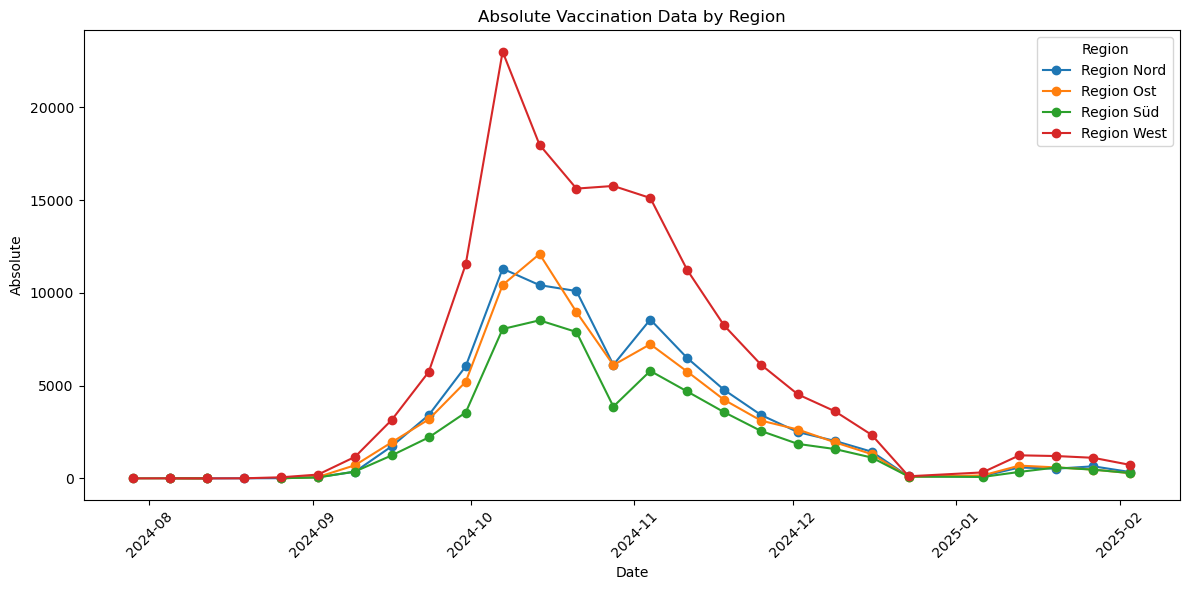

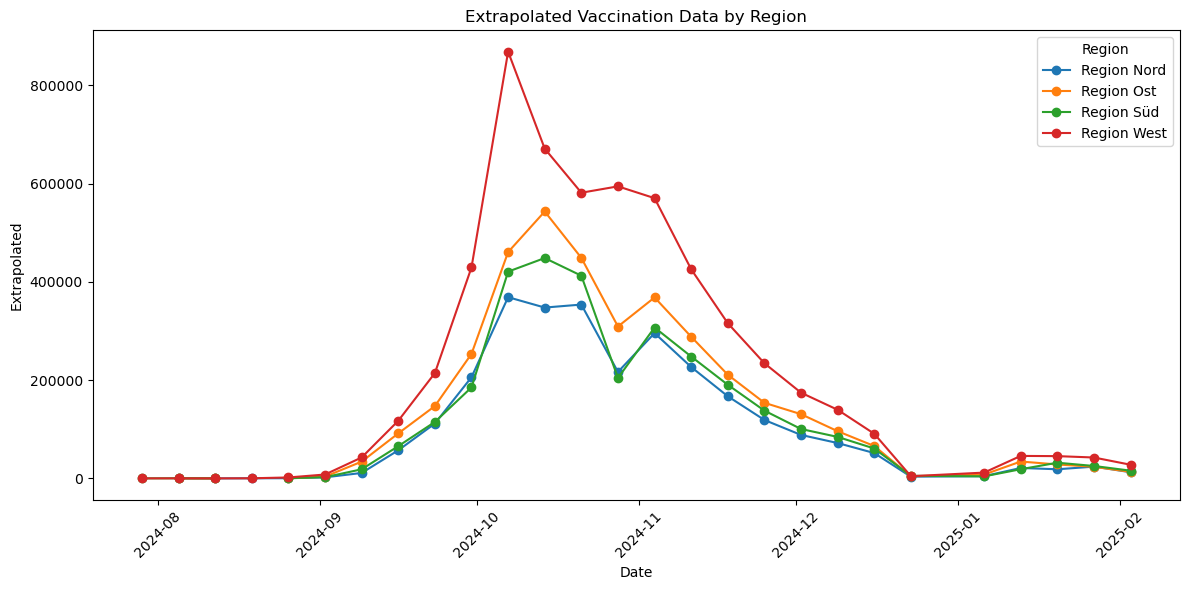

In [13]:
#Region Bezogen 
# Assume with_risk is your DataFrame with columns:
# ['week', 'kvregion', 'region', 'specialization', 'gender', 'age_group',
#  'insurancecode', 'insurancetype', 'risk_groups', 'absolute', 'extrapolated']

# Step 1: Convert the 'week' column to a datetime (using Monday as reference)
with_risk['date'] = pd.to_datetime(with_risk['week'] + '-1', format='%Y-%W-%w')

# Step 2: Group by date and region, summing 'absolute' (actual) data
grouped_absolute = with_risk.groupby(['date', 'region'])['absolute'].sum().reset_index()
pivot_absolute = grouped_absolute.pivot(index='date', columns='region', values='absolute')

# Group by date and region, summing 'extrapolated' data
grouped_extrapolated = with_risk.groupby(['date', 'region'])['extrapolated'].sum().reset_index()
pivot_extrapolated = grouped_extrapolated.pivot(index='date', columns='region', values='extrapolated')

# Step 3: Plot Actual Data (absolute)
plt.figure(figsize=(12, 6))
for region in pivot_absolute.columns:
    plt.plot(pivot_absolute.index, pivot_absolute[region], marker='o', label=region)
plt.title('Absolute Vaccination Data by Region')
plt.xlabel('Date')
plt.ylabel('Absolute')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Plot Extrapolated Data
plt.figure(figsize=(12, 6))
for region in pivot_extrapolated.columns:
    plt.plot(pivot_extrapolated.index, pivot_extrapolated[region], marker='o', label=region)
plt.title('Extrapolated Vaccination Data by Region')
plt.xlabel('Date')
plt.ylabel('Extrapolated')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

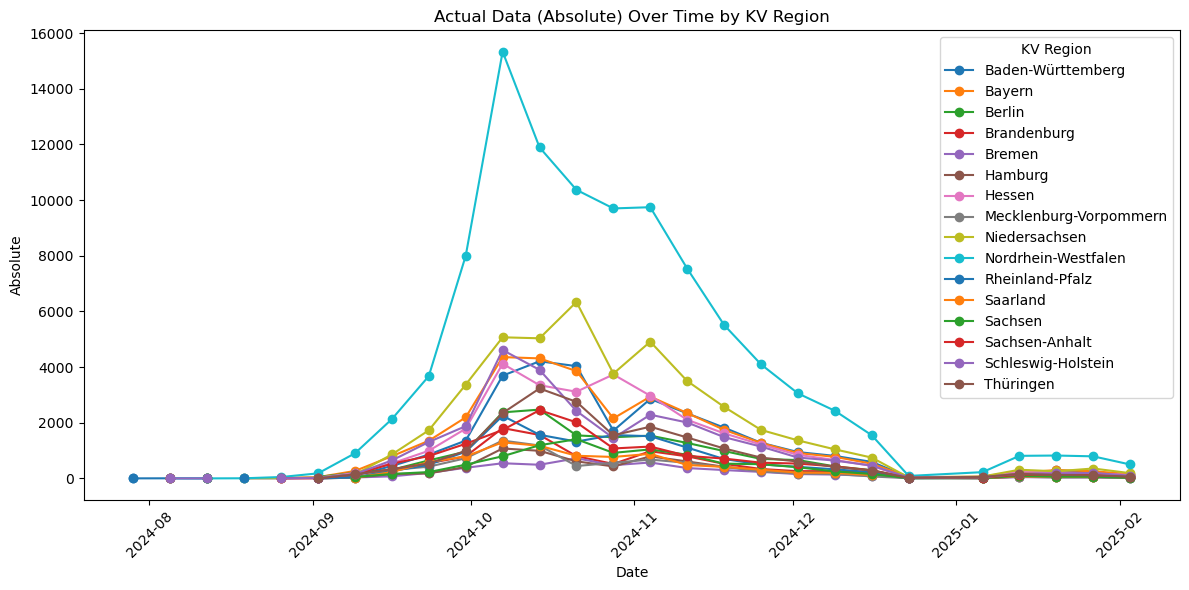

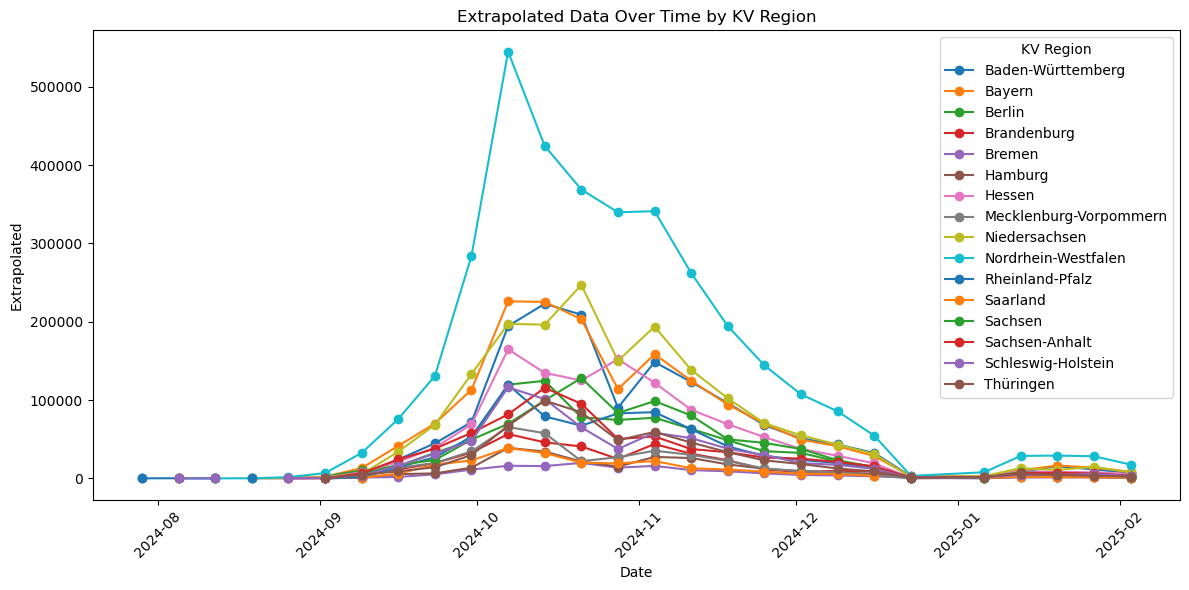

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume with_risk is your DataFrame with the following columns:
# ['week', 'kvregion', 'region', 'specialization', 'gender', 'age_group',
#  'insurancecode', 'insurancetype', 'risk_groups', 'absolute', 'extrapolated']

# Step 1: Convert the 'week' column to a datetime (using Monday as the reference day)
with_risk['date'] = pd.to_datetime(with_risk['week'] + '-1', format='%Y-%W-%w')

# Step 2: Group by date and kvregion, summing 'absolute' (actual) data
grouped_absolute_kv = with_risk.groupby(['date', 'kvregion'])['absolute'].sum().reset_index()
pivot_absolute_kv = grouped_absolute_kv.pivot(index='date', columns='kvregion', values='absolute')

# Group by date and kvregion, summing 'extrapolated' data
grouped_extrapolated_kv = with_risk.groupby(['date', 'kvregion'])['extrapolated'].sum().reset_index()
pivot_extrapolated_kv = grouped_extrapolated_kv.pivot(index='date', columns='kvregion', values='extrapolated')

# Step 3: Plot Actual Data (absolute) by KV Region
plt.figure(figsize=(12, 6))
for kv in pivot_absolute_kv.columns:
    plt.plot(pivot_absolute_kv.index, pivot_absolute_kv[kv], marker='o', label=kv)
plt.title('Actual Data (Absolute) Over Time by KV Region')
plt.xlabel('Date')
plt.ylabel('Absolute')
plt.legend(title='KV Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Plot Extrapolated Data by KV Region
plt.figure(figsize=(12, 6))
for kv in pivot_extrapolated_kv.columns:
    plt.plot(pivot_extrapolated_kv.index, pivot_extrapolated_kv[kv], marker='o', label=kv)
plt.title('Extrapolated Data Over Time by KV Region')
plt.xlabel('Date')
plt.ylabel('Extrapolated')
plt.legend(title='KV Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()